In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt

import plotly.express as px
import yfinance as yf


In [2]:
train_len =4625

In [3]:
ticket =ticker= 'KEPL3'

msft = yf.Ticker(ticket+'.SA')

data = msft.info
bvps = data.get('bookValue')
eps = data.get('trailingEps')
hist = msft.history(period="10y")
dfs = hist.copy()
dfs.dropna(inplace=True)

msft = yf.Ticker('^BVSP')

msft.info

hist = msft.history(period="10y")
dfb = hist.copy()

dfb = dfb.add_suffix('_ibo')
print(dfb.shape)
dfb.head()
df = dfs.copy()

(2478, 7)


In [4]:
# path = 'data/CSNA3.SA.csv'
# ticket = path.split('/')[1].split('.')[0]
# df = pd.read_csv(path)
# df.dropna(inplace=True)
# print(df.shape)
# df.head()

In [5]:
# df.reset_index(inplace=True)
# df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x[:7], format='%Y-%m'))

In [6]:

# df = df.set_index(df['Date']).drop('Date',axis=1)

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-04-24 00:00:00-03:00,3.567244,3.567244,3.474277,3.503030,226200,0.000000,0.0
2014-04-25 00:00:00-03:00,3.477153,3.593122,3.469485,3.545201,83400,0.000000,0.0
2014-04-28 00:00:00-03:00,3.583640,3.648727,3.552554,3.552554,265200,0.082617,0.0
2014-04-29 00:00:00-03:00,3.548669,3.558384,3.529240,3.554497,154200,0.000000,0.0
2014-04-30 00:00:00-03:00,3.548669,3.558383,3.491354,3.526326,262800,0.000000,0.0


In [8]:
fig = px.line(df,y='Close',x=df.index)
fig.show()

c:\Users\OtavioDaflon\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [9]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-04-24 00:00:00-03:00,3.567244,3.567244,3.474277,3.503030,226200,0.000000,0.0
2014-04-25 00:00:00-03:00,3.477153,3.593122,3.469485,3.545201,83400,0.000000,0.0
2014-04-28 00:00:00-03:00,3.583640,3.648727,3.552554,3.552554,265200,0.082617,0.0
2014-04-29 00:00:00-03:00,3.548669,3.558384,3.529240,3.554497,154200,0.000000,0.0
2014-04-30 00:00:00-03:00,3.548669,3.558383,3.491354,3.526326,262800,0.000000,0.0
...,...,...,...,...,...,...,...
2024-04-17 00:00:00-03:00,10.080000,10.130000,9.850000,9.910000,736100,0.000000,0.0
2024-04-18 00:00:00-03:00,9.960000,10.050000,9.710000,9.780000,715300,0.000000,0.0
2024-04-19 00:00:00-03:00,9.760000,10.010000,9.730000,10.010000,1126900,0.000000,0.0


In [10]:
# Tá pesado!
'''
plt.figure(figsize=(16,8))
plt.title('Série de preço de {}'.format(ticket))
plt.plot(df.Close)
plt.xlabel('data',fontsize=18)
plt.ylabel('preco',fontsize=18)
plt.show()
'''

"\nplt.figure(figsize=(16,8))\nplt.title('Série de preço de {}'.format(ticket))\nplt.plot(df.Close)\nplt.xlabel('data',fontsize=18)\nplt.ylabel('preco',fontsize=18)\nplt.show()\n"

In [11]:
data = df.filter(['Close'])
dataset = data.values
train_len = math.ceil(len(dataset)*.8)

#tamanho treino: 4625, teste: 1157

#from sklearn.model_selection import train_test_split #classe  é randomico !
#y_train,y_test= train_test_split(data,test_size=0.2)


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
def normalize_array(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    norm_arr = (arr - min_val) / (max_val - min_val)
    return norm_arr
#normalize_array(dataset)

In [13]:
dataset

array([[ 3.50302982],
       [ 3.54520082],
       [ 3.55255437],
       ...,
       [10.01000023],
       [ 9.90999985],
       [ 9.80000019]])

In [14]:
train_data = dataset[0:train_len, : ]

In [15]:
xtrain = []
ytrain = []
for i in range(60,len(train_data)):
    xtrain.append(train_data[i-60:i,0])
    ytrain.append(train_data[i,0])
    if i <= 60:
        print(xtrain)
        print(ytrain)
        print()

[array([3.50302982, 3.54520082, 3.55255437, 3.55449748, 3.5263257 ,
       3.48261023, 3.39032388, 3.38449526, 3.41461015, 3.42335272,
       3.45832443, 3.46803904, 3.74975681, 3.84690094, 3.86535788,
       3.83524346, 3.88090062, 3.85467196, 3.85370064, 3.88187265,
       3.87507248, 3.91198754, 3.95375896, 3.99067378, 4.07907438,
       4.07033253, 4.09170294, 4.08004618, 4.01204538, 4.0023303 ,
       3.97610211, 4.01690197, 3.93432975, 3.98290229, 3.99650288,
       3.97415924, 3.98290229, 3.98290229, 3.98970175, 3.88575816,
       3.96347332, 3.98290229, 3.98290229, 3.95375896, 3.98290229,
       4.02175951, 4.00718784, 4.0402174 , 4.07033253, 4.08878899,
       4.12570381, 4.15387487, 4.14221811, 4.10433102, 4.11890364,
       4.14610434, 4.15387487, 4.3714776 , 4.5026226 , 4.4831934 ])]
[4.541479110717773]



In [16]:
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [17]:
xtrain[0]

array([3.50302982, 3.54520082, 3.55255437, 3.55449748, 3.5263257 ,
       3.48261023, 3.39032388, 3.38449526, 3.41461015, 3.42335272,
       3.45832443, 3.46803904, 3.74975681, 3.84690094, 3.86535788,
       3.83524346, 3.88090062, 3.85467196, 3.85370064, 3.88187265,
       3.87507248, 3.91198754, 3.95375896, 3.99067378, 4.07907438,
       4.07033253, 4.09170294, 4.08004618, 4.01204538, 4.0023303 ,
       3.97610211, 4.01690197, 3.93432975, 3.98290229, 3.99650288,
       3.97415924, 3.98290229, 3.98290229, 3.98970175, 3.88575816,
       3.96347332, 3.98290229, 3.98290229, 3.95375896, 3.98290229,
       4.02175951, 4.00718784, 4.0402174 , 4.07033253, 4.08878899,
       4.12570381, 4.15387487, 4.14221811, 4.10433102, 4.11890364,
       4.14610434, 4.15387487, 4.3714776 , 4.5026226 , 4.4831934 ])

In [18]:

#xtrain = normalize_array(xtrain)
#ytrain = normalize_array(ytrain)

In [19]:

scaler = MinMaxScaler(feature_range=(0,1))
'''
xtrain = scaler.fit_transform(xtrain.reshape(-1,1))
ytrain = scaler.fit_transform(ytrain.reshape(-1,1))
'''

'\nxtrain = scaler.fit_transform(xtrain.reshape(-1,1))\nytrain = scaler.fit_transform(ytrain.reshape(-1,1))\n'

In [20]:
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1929, 60, 1)

In [21]:
xtrain.shape

(1929, 60, 1)

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(xtrain,ytrain,batch_size=2,epochs=1)

965/965 [==============================] - 19s 20ms/step - loss: 0.0247


In [26]:
test = scaled_data[train_len - 60: , :]
xtest = []
ytest = dataset[train_len : , : ]
for i in range(60,len(test)):
    xtest.append(test[i-60:i, 0])


In [27]:
xtest = np.array(xtest)
xtest = np.reshape(xtest,(xtest.shape[0], xtest.shape[1],1))

In [28]:
predictions = model.predict(xtest)
#predictions = scaler.inverse_transform(predictions)
def denormalize_array(norm_arr, original_arr):
    min_val = np.min(original_arr)
    max_val = np.max(original_arr)
    denorm_arr = norm_arr * (max_val - min_val) + min_val
    return denorm_arr

predictions = denormalize_array(predictions, dataset)

predictions

16/16 [==============================] - 1s 13ms/step


array([[ 9.050252 ],
       [ 9.191682 ],
       [ 9.303058 ],
       [ 9.387058 ],
       [ 9.445345 ],
       [ 9.50486  ],
       [ 9.46024  ],
       [ 9.436501 ],
       [ 9.345676 ],
       [ 9.265328 ],
       [ 9.228228 ],
       [ 9.221638 ],
       [ 9.256093 ],
       [ 9.236493 ],
       [ 9.237132 ],
       [ 9.208364 ],
       [ 9.217826 ],
       [ 9.231658 ],
       [ 9.279579 ],
       [ 9.339366 ],
       [ 9.542616 ],
       [ 9.74525  ],
       [ 9.907077 ],
       [10.009707 ],
       [10.060446 ],
       [10.041549 ],
       [ 9.986648 ],
       [ 9.929022 ],
       [ 9.824059 ],
       [ 9.666296 ],
       [ 9.508247 ],
       [ 9.339815 ],
       [ 9.155291 ],
       [ 8.97731  ],
       [ 8.82953  ],
       [ 8.754185 ],
       [ 8.641141 ],
       [ 8.497326 ],
       [ 8.312009 ],
       [ 8.155531 ],
       [ 8.009707 ],
       [ 7.910031 ],
       [ 7.8620014],
       [ 7.854534 ],
       [ 7.797712 ],
       [ 7.7458324],
       [ 7.7234325],
       [ 7.70

In [29]:
predictions 

array([[ 9.050252 ],
       [ 9.191682 ],
       [ 9.303058 ],
       [ 9.387058 ],
       [ 9.445345 ],
       [ 9.50486  ],
       [ 9.46024  ],
       [ 9.436501 ],
       [ 9.345676 ],
       [ 9.265328 ],
       [ 9.228228 ],
       [ 9.221638 ],
       [ 9.256093 ],
       [ 9.236493 ],
       [ 9.237132 ],
       [ 9.208364 ],
       [ 9.217826 ],
       [ 9.231658 ],
       [ 9.279579 ],
       [ 9.339366 ],
       [ 9.542616 ],
       [ 9.74525  ],
       [ 9.907077 ],
       [10.009707 ],
       [10.060446 ],
       [10.041549 ],
       [ 9.986648 ],
       [ 9.929022 ],
       [ 9.824059 ],
       [ 9.666296 ],
       [ 9.508247 ],
       [ 9.339815 ],
       [ 9.155291 ],
       [ 8.97731  ],
       [ 8.82953  ],
       [ 8.754185 ],
       [ 8.641141 ],
       [ 8.497326 ],
       [ 8.312009 ],
       [ 8.155531 ],
       [ 8.009707 ],
       [ 7.910031 ],
       [ 7.8620014],
       [ 7.854534 ],
       [ 7.797712 ],
       [ 7.7458324],
       [ 7.7234325],
       [ 7.70

In [30]:
rmse = np.sqrt(np.mean(predictions - ytest)**2)
rmse

1.35735015849952

C:\Users\OtavioDaflon\AppData\Local\Temp\ipykernel_19016\3028599171.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



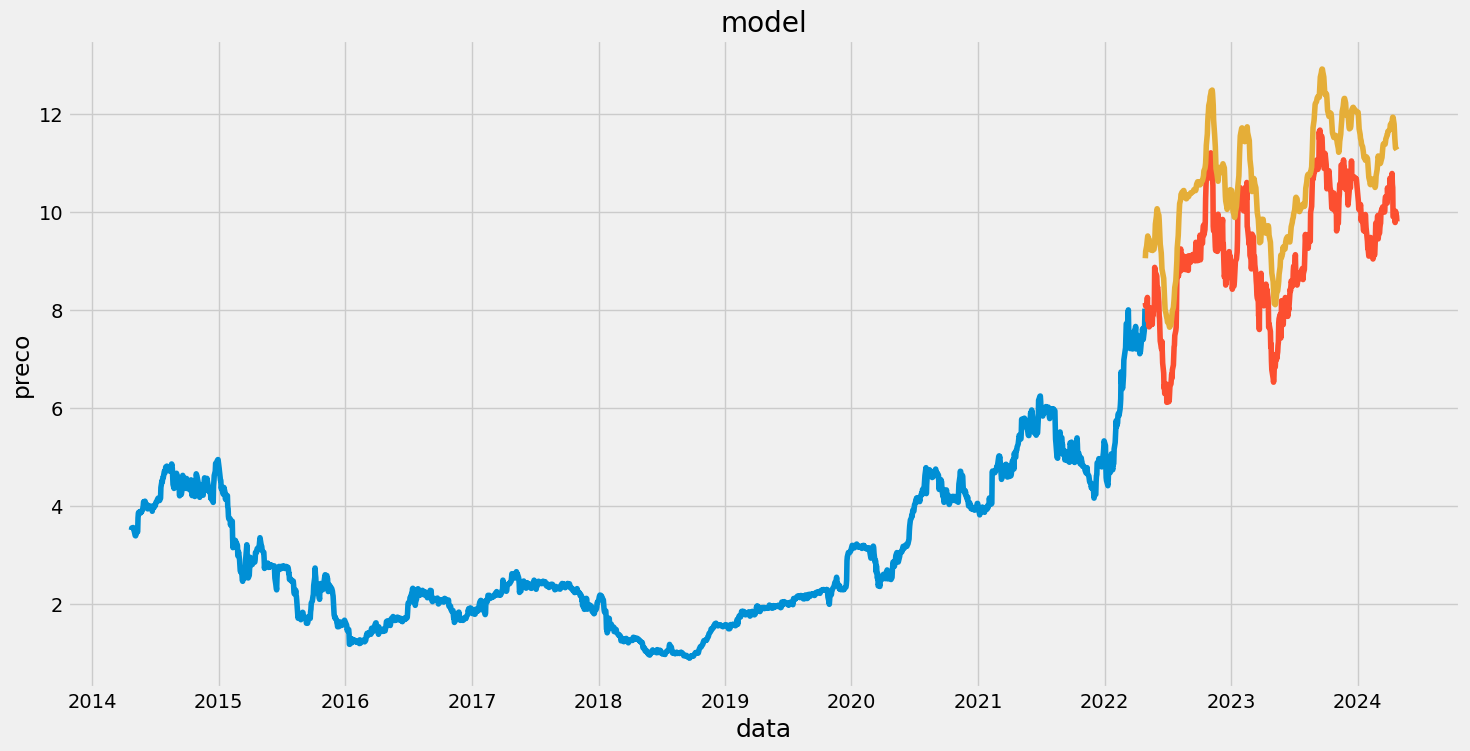

In [31]:
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('data',fontsize=18)
plt.ylabel('preco')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()